In [31]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [32]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                   sheet_name='Canada by Citizenship',
                   skiprows = range(20), 
                   skipfooter = 2)
print("Data imported and succesfully framed.")

Data imported and succesfully framed.


In [33]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [34]:
#finding out the number of data rows
print(df_can.shape)

(195, 43)


In [35]:
#clean up the unnecessary data columns for consistency
df_can.drop(['AREA','Coverage','REG','DEV','Type'],axis=1, inplace =True)

In [36]:
#rename some of the columns for reliability
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)

In [37]:
#set all the columns to string
df_can.columns = list(map(str,df_can.columns))

In [38]:
#indexing Country in the first so that it is easy to access
df_can.set_index('Country',inplace = True)

In [39]:
#creating the total columns
df_can['Total'] = df_can.sum(axis=1)

In [40]:
#converting the years into string
years = list(map(str,range(1980,2014)))
print("Data dimensions:", df_can.shape)

Data dimensions: (195, 38)


In [41]:
#lets take a look at the new Dataframe of Denmark, sweden and norway
df_dsn = df_can.loc[['Denmark','Sweden','Norway'],:]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327


In [42]:
#compute the proportions for which they are divided
total_values = sum(df_dsn['Total'])
category_proportions = [float(value)/total_values for value in df_dsn['Total']]

#print out the proportions
for i,proportions in enumerate(category_proportions):
    print(df_dsn.index.values[i]+" : "+ str(proportions))

Denmark : 0.32255663965602777
Sweden : 0.48503390110798744
Norway : 0.1924094592359848


In [43]:
width = 40
height = 10

total_num_tiles = width * height
print("The Total number of tiles:",total_num_tiles)

The Total number of tiles: 400


In [48]:
#compute the number of tiles of each category
titles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

#print the number of tiles of each category
for i, proportion in enumerate(titles_per_category):
    print(df_dsn.index.values[i]+" : "+str(proportion))

Denmark : 129
Sweden : 194
Norway : 77


In [53]:
#initialize the waffle chart
waffle_chart = np.zeros((height,width))

#initialize the indexes 
category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        
        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(titles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
        
        # set the class value to an integer, which increases with class
        waffle_chart[row,col] = category_index
        
print("Waffle chart populated!")

Waffle chart populated!


In [54]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

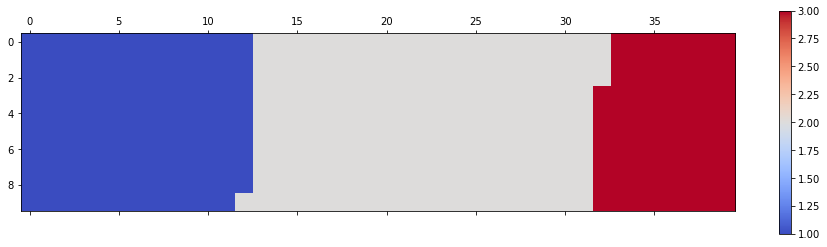

In [56]:
#Map the waffle chart matrix into a visual.
#instantiate a new fig
fig = plt.figure()

#use matshow to display
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], <a list of 0 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

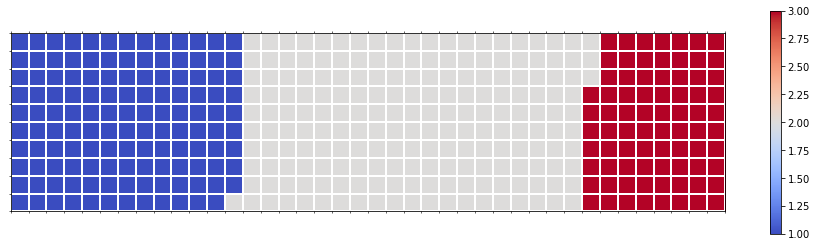

In [58]:
#Prettify the chart.
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

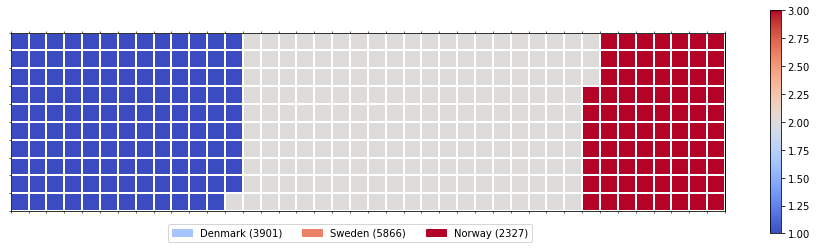

In [59]:
#Create a legend and add it to chart.
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )